In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sn

In [5]:
data = pd.read_csv("train.csv/train.csv")
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [17]:

has_braces = data.loc[data['comment_text'].str.contains('{', regex = False)]

# no_braces = data.loc['{' in data['comment_text']]
has_braces

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
162,0063f66706c20dfa,"""\nKatelyn Faber\nCould you weigh in at the bo...",0,0,0,0,0,0
183,006f2c1459f3b6b1,"""== new ==\n\n{{userbox \n TABTAB| id = \n TA...",0,0,0,0,0,0
261,00a6754c92b4af4f,"""#if:|== ==|}}\n{| width=""""100%"""" style=""""bac...",0,0,0,0,0,0
543,016c3ec38be1d0a6,"Welcome!\n\nHello, Soundchu, and welcome to Wi...",0,0,0,0,0,0
630,01ae8496770c49db,"Welcome!\n\nHello, , and welcome to Wikipedia!...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159143,f9321888a2ca1c37,"""}\n|}\n\n From User talk:Jimbo Wales I wonder...",0,0,0,0,0,0
159151,f957e8c2e117b133,"""{| class=""""infobox"""" width=""""315px""""\n|-\n! a...",0,0,0,0,0,0
159159,f979362f2605d54d,"""\n Your submission at Articles for creation \...",0,0,0,0,0,0
159201,fa2466732441b9a1,"Welcome!\n\nHello, Schweboo, and welcome to Wi...",0,0,0,0,0,0


In [25]:
# ((data['comment_text'].str.contains('{', regex = False) - 1)* -1).astype(bool)

no_braces = data.loc[((data['comment_text'].str.contains('{', regex = False) - 1)* -1).astype(bool)]
no_braces

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [54]:
# do not want to deal w/ braces
# as braces gnerally indicate that there is metadata contained in the text
# toxic_braces = sum(has_braces["toxic"])

total_data = data.shape[0]
print(f"total amount of data: {total_data}\n")
print(f'With Braces info:')

for col in has_braces:
    if col not in ['id', 'comment_text']:
        amt = sum(has_braces[col])
        print(f'\t{col}: {amt}, {amt/total_data*100}% of all data')
        
print(f'\nNo Braces info:')
for col in no_braces:
    if col not in ['id', 'comment_text']:
        amt = sum(no_braces[col])
        print(f'\t{col}: {amt}, {amt/total_data*100}% of all data')

print('\n % positive data in has braces')
for col in no_braces:
    if col not in ['id', 'comment_text']:
        no_brace_amt = sum(no_braces[col])
        yes_brace_amt = sum(has_braces[col])
        print(f'\t{col}: {yes_brace_amt/(no_brace_amt + yes_brace_amt) * 100}%')
# print('total rows of data: 159571')

total amount of data: 159571

With Braces info:
	toxic: 50, 0.031334014325911354% of all data
	severe_toxic: 7, 0.0043867620056275885% of all data
	obscene: 32, 0.020053769168583264% of all data
	threat: 2, 0.001253360573036454% of all data
	insult: 24, 0.015040326876437448% of all data
	identity_hate: 5, 0.003133401432591135% of all data

No Braces info:
	toxic: 15244, 9.553114287683853% of all data
	severe_toxic: 1588, 0.9951682949909444% of all data
	obscene: 8417, 5.274767971623916% of all data
	threat: 476, 0.29829981638267605% of all data
	insult: 7853, 4.921320290027636% of all data
	identity_hate: 1400, 0.8773524011255178% of all data

 % positive data in has braces
	toxic: 0.32692559173532104%
	severe_toxic: 0.438871473354232%
	obscene: 0.3787430465143804%
	threat: 0.41841004184100417%
	insult: 0.3046845245651898%
	identity_hate: 0.3558718861209964%


In [76]:
# because less the 1/2% of positive data has braces, I don't think that we need to
# include the has braces part during training

# string = no_braces['comment_text'][0]
# list(filter(str.isupper, no_braces['comment_text']))
# no_braces['cap_amount'] = list(filter(str.isupper, no_braces['comment_text']))
# sum(map(str.isupper, list(filter(str.isalpha, string))))

percentage = []
for s in no_braces['comment_text']:
    percentage.append(len(list(filter(str.isupper, s)))/ len(s))

no_braces['percent_cap'] = percentage


C:\Users\reada\AppData\Local\Temp\ipykernel_19652\870017946.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_braces['percent_cap'] = percentage


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,percent_cap
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.064394
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.071429
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.017167
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.017685
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.029851
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0.006780
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0.020202
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0.049383
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0.017241


In [82]:
# has_braces['length'] = len(has_braces['comment_text'])
no_braces['length'] = [len(s) for s in no_braces['comment_text']]
no_braces

C:\Users\reada\AppData\Local\Temp\ipykernel_19652\3879424149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_braces['length'] = [len(s) for s in no_braces['comment_text']]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,percent_cap,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.064394,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.071429,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.017167,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.017685,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.029851,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0.006780,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0.020202,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0.049383,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0.017241,116


C:\Users\reada\AppData\Local\Temp\ipykernel_19652\3725636024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = no_braces.corr()


<AxesSubplot: >

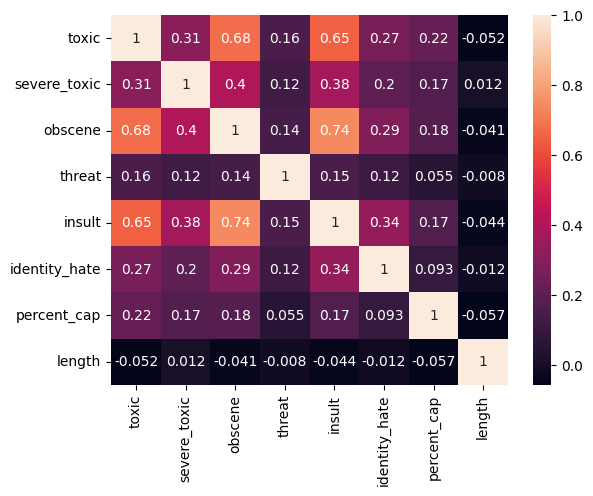

In [86]:
corr_matrix = no_braces.corr()
sn.heatmap(corr_matrix, annot = True)



In [95]:
toxic = (no_braces['toxic'] + no_braces['severe_toxic'] + no_braces['obscene'] + no_braces['threat'] + no_braces['insult'] + no_braces['identity_hate'])>0
not_toxic = (no_braces['toxic'] + no_braces['severe_toxic'] + no_braces['obscene'] + no_braces['threat'] + no_braces['insult'] + no_braces['identity_hate']) == 0
no_braces_only_toxic = no_braces.loc[toxic]
no_braces_not_toxic = no_braces.loc[not_toxic]

Correlation within toxic:


C:\Users\reada\AppData\Local\Temp\ipykernel_19652\3374628985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = no_braces_only_toxic.corr()


<AxesSubplot: >

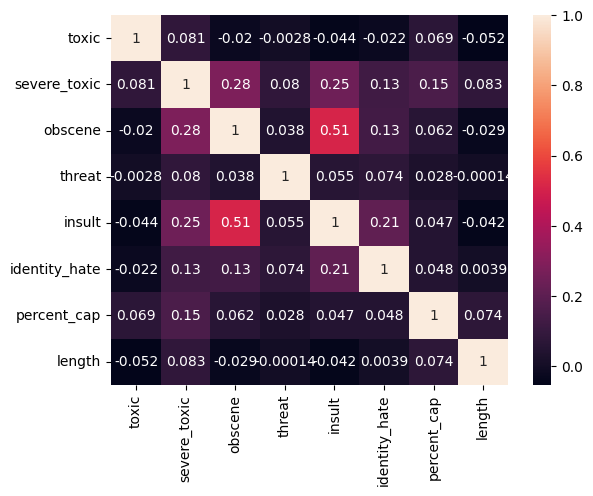

In [97]:
print('Correlation within toxic:')
corr_mat = no_braces_only_toxic.corr()
sn.heatmap(corr_mat, annot = True)

https://towardsdatascience.com/natural-language-processing-classification-using-deep-learning-and-word2vec-50cbadd3bd6a